# Churn Prediction for Waze Users: Insights Through EDA, Regression, and Decision Tree Models

In this notebook, we will perform Exploratory Data Analysis (EDA) and build models to predict future customers at risk of churn.

**Purpose**
* The purpose of this project is to demonstrate expertise in Exploratory Data Analysis (EDA) and in building predictive models, specifically a binomial logistic regression model and a decision tree.

**Goal**
* The goal is to develop predictive models and evaluate their performance to derive actionable insights.

**Structure of the Notebook**
* Part 1: EDA & Model Assumption Checking

        * Purpose: Why is EDA important before constructing a binomial logistic regression model?
* Part 2: Model Building and Evaluation

        * Resources: What tools or resources did you use while building and evaluating the models?

* Part 3: Interpreting Model Results

        * Key Insights: What significant insights were gained from the model(s)?  
        * Business Recommendations: What actionable recommendations can be made based on the models and their outcomes?



## **Stage 1: Plan**

In the planning stage, it is crucial to clearly define the goal or purpose of the modeling process. This includes identifying:

**Objective:** What are you trying to achieve with the model? 

For example:

* Predicting customer churn.
* Improving customer retention strategies.
* Enhancing business decision-making through actionable insights.

**Evaluation Criteria:** Define how the model's performance will be measured. Common evaluation metrics for churn prediction include:

* Accuracy: Overall correctness of the model.
* Precision: The proportion of correctly predicted churn cases out of all predicted churn cases.
* Recall (Sensitivity): The proportion of actual churn cases correctly identified by the model.
* F1 Score: A balance between precision and recall.

**Business Relevance:** Ensure the objectives align with business needs. For instance, predicting churn is not enough—recommendations to reduce churn must follow.

In [1]:
# Import the packages for EDA and building models
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

# Packages for Decision Tree Model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



In [2]:
# Load the dataset
df = pd.read_csv('waze_dataset.csv')

# **Stage 2: Analyze**

The analyze phase ensures the data is prepared for modeling by cleaning, structuring, and selecting relevant features.

* Restructuring Data: Convert categorical variables to numerical, standardize numerical data, and format timestamps appropriately.

* Selecting Relevant Columns: Retain features directly influencing the target variable (e.g., churn) and eliminate irrelevant or redundant ones.

* Handling Missing Data: Impute missing values using mean, median, or mode, or drop columns/rows with excessive missingness.

* Managing Outliers: Identify outliers using statistical methods or visualizations, then cap, transform, or remove them as needed.

* Purpose of EDA: EDA helps understand data distribution, validate model assumptions, select features, and ensure alignment with business goals.

These steps prepare the data for building effective, business-relevant models.

### **Task 2a. Exploreatory Data Analysis**

Analyze the data to identify correlations, missing values, potential outliers, and duplicates.


Let's Start with:
* `head ()`
* `size`
* `shape`
* `info()`
* `describe()`

In [3]:
#display the first 10 columns of the dataset
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
#size of the dataset
print('size of the data set:',df.size)
#shape of the dataset
print('shape of the data set:',df.shape)

size of the data set: 194987
shape of the data set: (14999, 13)


In [5]:
# summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

Summary:
* the `label` column has missing 700 values.

In [7]:
# Use the `drop()` method to remove the ID column, as it does not contribute to the analysis or predictive modeling.
df = df.drop('ID', axis=1)

Now, check the class balance of the dependent (target) variable, `label`.

In [8]:
#let's check class balance 
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

In [9]:
#summary statistics 
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


* The following columns all seem to have outliers:
<br>
* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`


**All these columns have maximum values significantly exceeding the 75th percentile by several standard deviations, which suggests the presence of potential outliers in these variables.**

### **Task 2b. Dealing with Outliers**

**Steps for Data Preparation: Dealing with Outliers**

* 1. Identify Outliers

    * Understand the Data Distribution: Use statistical metrics like the mean() and median() to understand the range and central tendency of the data.
    * Visualize the Data: Use a boxplot to detect outliers by visualizing the spread and identifying extreme values.

* 2. Decide How to Handle Outliers

    * Choose an approach based on the dataset's purpose and the model's sensitivity to outliers:
    
        * Delete Outliers: If they are confirmed as errors, such as data entry mistakes. This is a rare approach.
        * Reassign Outliers: If the dataset is small or critical for modeling, replace outliers with derived values, such as the mean, median, or other statistically informed replacements.
        * Keep Outliers: If the dataset is only for EDA or if the model is robust to outliers (e.g., tree-based models), consider leaving them unchanged.

* 3. Apply the Chosen Approach

    * Implement the selected method systematically to maintain consistency and ensure data integrity.

The follwoing type of data visualizations can be helpful:

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map

**Usage of the Grapgh:**
* Box plots are helpful for outliers determination
* Histograms are helpful to understand the distribution of variables
* Scatter plots are helpful to visualize the relationships between variables
* Bar charts are helpful categorical information visualization 

#### Feature 1: `sessions`

_The number of occurrences of a user opening the app during the month_

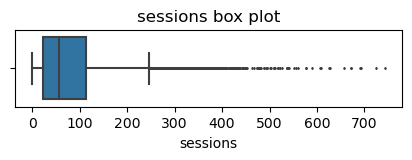

In [10]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions box plot');

In [11]:
# Helper function for plotting the histograms 
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plotting the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plotting the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

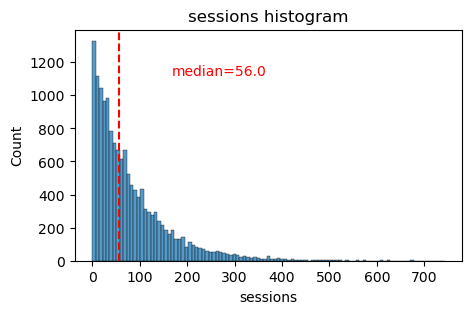

In [12]:
histogrammer('sessions')

Summary:
* The sessions variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. 
* It can be seen fron the boxplot, some users have more than 700. Some data points appear to be outliers, as their values significantly exceed the upper quartile range.

#### Feature 2: `drives`

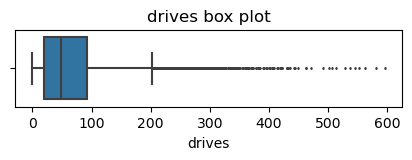

In [13]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot');

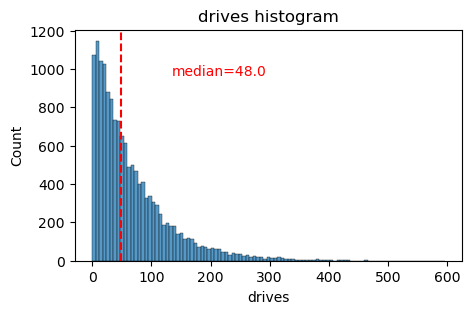

In [14]:
# Histogram for the drives
histogrammer('drives')

Summary: 

* The drives information follows a distribution similar to the sessions variable. 
* It is right-skewed, approximately log-normal, with a median of 48. 
* However, some drivers had over 200 drives in the last month.Some data points appear to be outliers, as their values significantly exceed the upper quartile range.

#### Feature 3: `total_sessions`

_A model estimate of the total number of sessions since a user has onboarded_

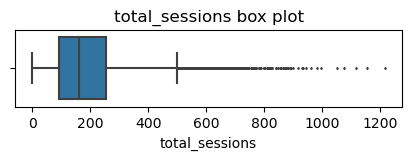

In [15]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

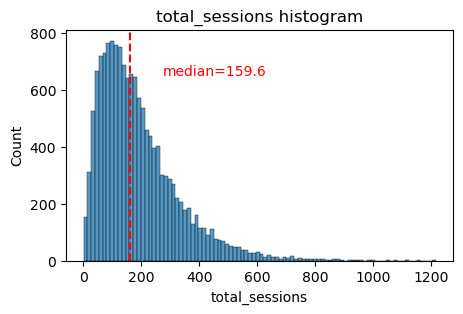

In [16]:
# Histogram 
histogrammer('total_sessions')

Summary: 

* The distribution of total_sessions is right-skewed, with a median value of 159.6. This is notable because if the median number of sessions in the last month is 56, it suggests that a significant proportion of a user's total sessions (~160) occurred within the last month. This pattern warrants further investigation to understand user behavior and trends.
* Some data points appear to be outliers, as their values significantly exceed the upper quartile range

#### Feature 4: `total_navigations_fav1`


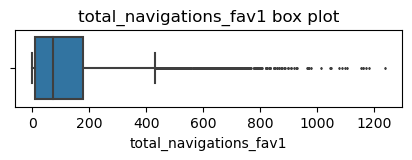

In [17]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_navigations_fav1'], fliersize=1)
plt.title('total_navigations_fav1 box plot');


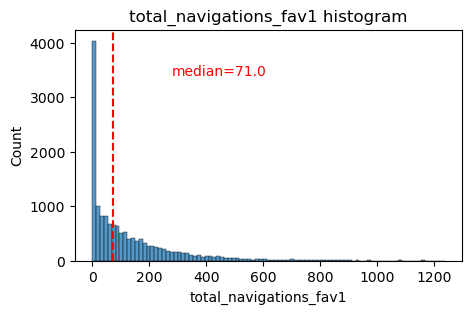

In [18]:
# Histogram 
histogrammer('total_navigations_fav1')

Summary: 
* In this box plot, several points above the upper whisker (values exceeding approximately 400) are flagged as outliers.
* This skew in the data distribution and the presence of outliers could have an impact on modeling or analysis, especially if outliers influence summary statistics or algorithms sensitive to extreme values.
* Most users fall in the lower range of navigation counts (close to 0–200), indicating typical usage behavior.
* The presence of extreme values (up to ~1200) in the long tail might represent power users or anomalous behavior, which could impact summary statistics or skew the analysis if not handled appropriately.

#### Feature 5: `total_navigations_fav2`

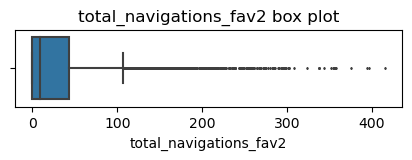

In [19]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_navigations_fav2'], fliersize=1)
plt.title('total_navigations_fav2 box plot');


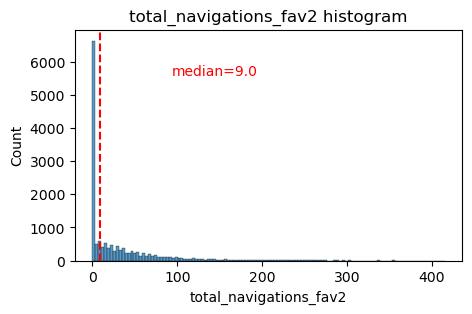

In [20]:
# Histogram 
histogrammer('total_navigations_fav2')

Summary: 
* In this box plot, several points above the upper whisker (values exceeding approximately 400) are flagged as outliers.
* The data is heavily concentrated on the left side, with a steep drop-off as the values increase
* The majority of users navigate very few times using fav2, suggesting this feature might not be widely used.
* The extreme values in the tail could be important to analyze further to determine if they are valid data points (e.g., power users) or anomalies.

#### Feature 6: `driven_km_drives`

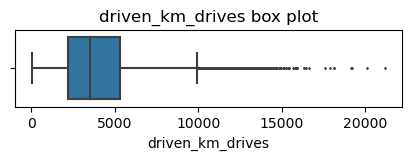

In [21]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');


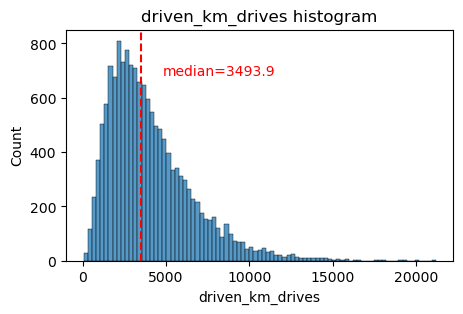

In [22]:
# Histogram 
histogrammer('driven_km_drives')

Summary:

* The distribution of the number of kilometers driven in the last month per user is right-skewed, with half the users driving less than 3,495 kilometers.
* This dataset highlights heavy driving activity, as the maximum distance driven in a month exceeds half the circumference of the Earth.

#### Feature 7: `duration_minutes_drives`

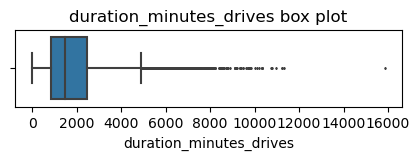

In [23]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');


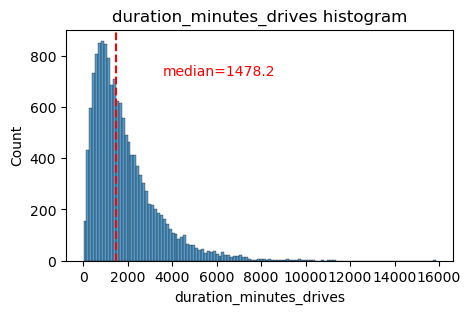

In [24]:
# Histogram 
histogrammer('duration_minutes_drives')

Summary:

* The featuree has a heavily skewed right tail. 
* Half of the users drove less than ~ 1478 minutes (~25 hours), but some users clocked over 250 hours over the month.

## Other Features

####  Feature 8: `n_days_after_onboarding`

_The number of days since a user signed up for the app_

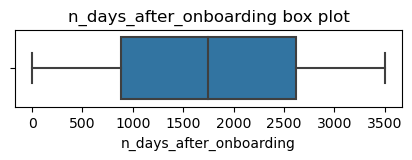

In [25]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

Median: 1741.0


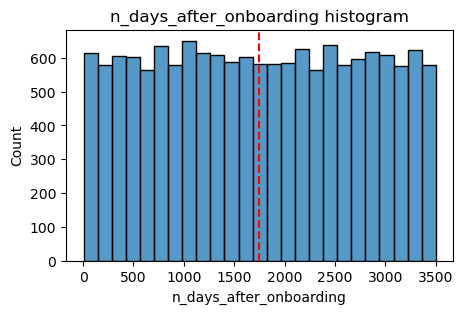

In [26]:
# Histogram
histogrammer('n_days_after_onboarding', median_text=False)

Summary:
* The n_days_after_onboarding is a uniform distribution with values ranging from near-zero to ~ 3,500 (~ 9.5 years).

#### Feature 9: `driving_days`

_Number of days the user drives (at least 1 km) during the month_

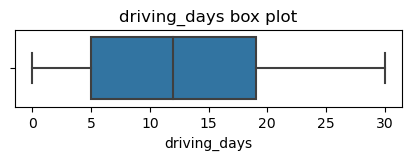

In [27]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

Median: 12.0


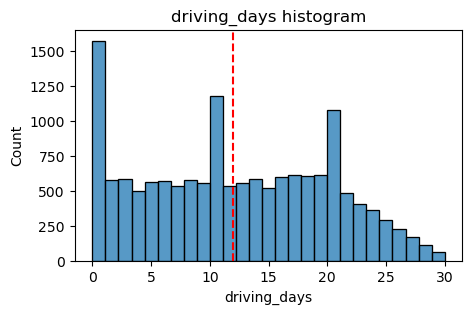

In [28]:
# Histogram
histogrammer('driving_days', median_text=False)

Summary:

* The distribution of the number of days users drove each month is nearly uniform and closely aligns with the number of days they opened the app, except that the driving_days distribution tapers off on the higher end.

* Interestingly, about twice as many users (~1,000 vs. ~550) did not drive at all during the month compared to those who did not open the app. This is counterintuitive, as the activity_days variable shows ~500 users consistently opening the app across most day counts, with only ~250 users who did not open the app at all and another ~250 who opened it every single day. This discrepancy warrants further investigation.

#### Feature 10: `device`

_The type of device a user starts a session with_

As it is a categorical variable, rather than the box plot a pie chart can provide some insights.

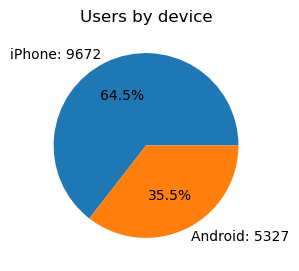

In [29]:
# Pie chart for user type based on the device
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

Summary:

* Almost twice iPhone users use the Waze App compared to the Android users.

#### Feature 10: `label`
As this a categorical variable, pie chart instead can be drawn.

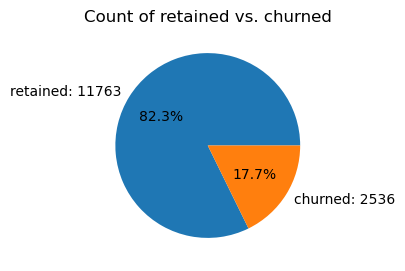

In [30]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Summary: 
* Less than 18% customer churned 

# Multiple feature Comparison

#### MF1:  `driving_days` vs. `activity_days`**

Since both driving_days and activity_days represent counts of days over a month and are closely related, plotting them together on a single histogram is a practical approach. This allows for a clear comparison of their distributions and relationships without needing to switch between separate histograms.

Create a combined histogram where each bar represents the counts for a given day, showing both driving_days and activity_days side by side. This visualization will provide a direct comparison of the two variables across all day counts.

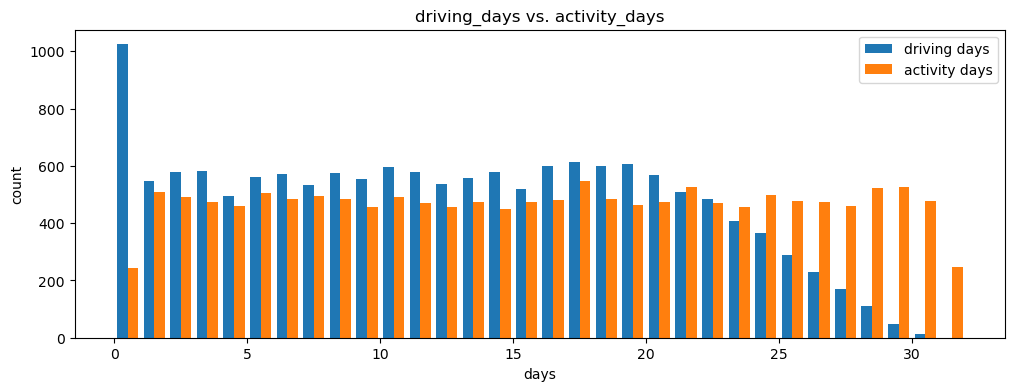

In [31]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

Summary:

* Counterintuitive Observation: There are fewer users who didn’t use the app at all during the month compared to those who didn’t drive at all, which may initially seem unexpected.

* Possible Explanation: While driving_days and activity_days are related, they are not identical. Users might open the app more frequently than they use it for driving—for tasks like checking drive times, route information, updating settings, or even accidental usage.

* Potential Discrepancy: The number of days in the month appears inconsistent between the two variables. This could suggest data differences or inaccuracies.

* Action Item: Contact the Waze data team for clarification, especially regarding the discrepancy in the maximum number of days for `driving_days` and `activity_days`.

* Next Step: Confirm the maximum values for both variables to investigate further.

In [32]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


Summary:
* Unlikely Scenario: While it's theoretically possible that no user drove all 31 days of the month, this is highly improbable given the dataset represents 15,000 users.

* Validation Suggestion: To assess the validity of these variables, create a scatter plot with one variable (e.g., `driving_days`) on the x-axis and the other (e.g., `activity_days`) on the y-axis. This will help visualize their relationship and detect any anomalies.

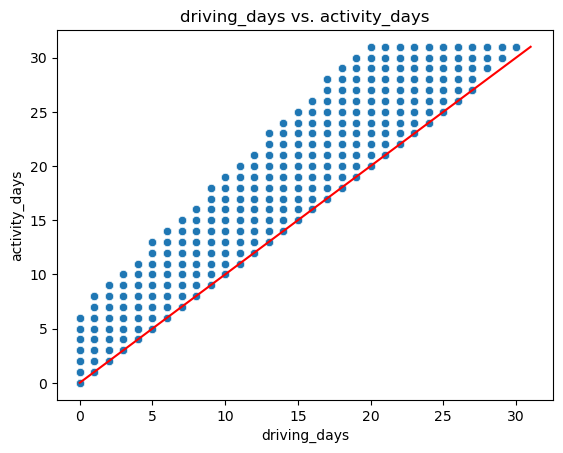

In [33]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='-');

Summary:
* Theoretical Limit: By definition, every `driving_day` must also count as an `activity_day`, meaning a user cannot have more `driving_days` than `activity_days`.

* Data Validation: None of the samples in the dataset violate this rule, which confirms the data aligns with this logical constraint.

#### RF2: Retention by Device

* Create a histogram with four bars—one for each device-label combination—to visualize the number of iPhone users who were retained or churned and the number of Android users who were retained or churned. 

* It can provide a clear comparison of retention and churn rates across device types.

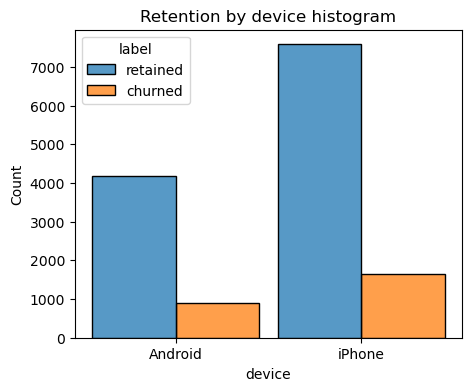

In [34]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

Summary:
* It shows that the retention is consistent irrespective of the device type

### **Task 2c. Creating new features**

Let's create features that are relevant to the stakeholder's interests and can effectively enhance or address the business scenario or problem at hand.

#### NF 1:`km_per_driving_day`

One valuable feature for EDA could be the correlation between churn rate and the distance driven per driving day in the last month. Engineering a feature to capture this information can provide meaningful insights.

* Create a new feature called km_per_driving_day, representing the average distance driven per driving day for each user.
* Use the describe() method to display the statistical summary of this new feature.

In [35]:
# Creating the feature named `km_per_driving_day` 
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Statistical summary of this new feature
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Summary:

* Some values in the `km_per_driving_day` column are infinite due to division by zero, as there are zero values in the `driving_days` column. When dividing by zero, pandas assigns infinity (`np.inf`) to the corresponding rows.
* Replace these infinite values with zero using `np.inf`.
* Call the function `describe()` on the `km_per_driving_day` column to validate that the adjustment was successful.

In [36]:
# 1. Replace the infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Validate that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

Summary:
* Looks like there is no infinite values. The value can be replaced by the mean/mode value  or drwaing from the distribution

#### NF2: `professional_driver`

Another new feature can be created: a binary feature named `professional_driver`. This feature will have a value of `1` for users who completed `60` or more drives and drove on `15` or more days in the last month.


In [37]:
# Creating the new feature `professional_driver` 
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

Let's conduct a simple analysis of the newly created professional_driver variable:

* Count Distribution: Determine the number of professional drivers (1) and non-professional drivers (0).

* Churn Rate by Class: Calculate the churn rate separately for professional and non-professional drivers to identify any differences in behavior between the two groups.

In [38]:
# 1. Count Distribution
print(df['professional_driver'].value_counts())

# 2. Churn Rate by Class
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

0    12405
1     2594
Name: professional_driver, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64

Summary:

* The churn rate for professional drivers is 7.6%, compared to 19.9% for non-professional drivers. 
* This significant difference suggests that the professional_driver feature could provide valuable predictive insight for the model.


### **Task 3a. Preparing variables**

Check wheather there is any missing values.

In [39]:
#find the missing value and feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

In [40]:
# validate the number of missing values
df.isnull().sum()

label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
km_per_driving_day           0
professional_driver          0
dtype: int64

Summary:
* Based on previous EDA, there is no evidence of a non-random cause for the 700 missing values in the label column. 
* Since these missing values account for less than 5% of the dataset, use the dropna() method to remove rows with missing data in this column

In [41]:
# Drop the missing values 
df = df.dropna(subset=['label'])

#### Handling Outliers

Outliers are rarely dropped unless there is a clear justification, such as typographic errors, data entry mistakes, or values that are physically or logically impossible. Instead, it is more common to handle them by imputing extreme values.

**Identified Variables with Outliers**

The following variables were identified from the previous EDA as containing clear signs of outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

**Imputation Approach**

For this analysis:

* Identify and calculate the 95th percentile for each of the above columns.
* Replace any value exceeding the 95th percentile with the calculated 95th percentile value.

This approach addresses potential errors or extreme deviations in the data while preserving the integrity of the dataset for analysis or modeling.


In [42]:
# Impute the outliers from the feature 
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

In [43]:
# find the statistics to validate and compare with the previous one
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


# Stage 3: Construct 

# Model 1: Logistic Regression

In this stage, the logistic regression model will be developed!

#### Task 3a. Encode the categorical variables

Convert the data type of the label column to binary, as required for training a logistic regression model:

* Assign `0` to all retained users.
* Assign `1` to all churned users.
* Save the modified variable as `label2` to preserve the original `label` column.


In [44]:
# Create the new column `label2` and display the value
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].head(10)

,label,label2
0,retained,0
1,retained,0
2,retained,0
3,retained,0
4,retained,0
5,retained,0
6,retained,0
7,retained,0
8,retained,0
9,churned,1


### **Task 3b. Determine whether assumptions have been met**

**Assumptions for Logistic Regression**

The following are key assumptions for logistic regression:

1. Independent Observations:
    * Data collection should ensure that observations are independent.
    * For this project, it is assumed that the observations meet this criterion.
    
2. No Extreme Outliers:

    * Outliers should be minimal or appropriately addressed.
    * This assumption has already been handled in prior steps.

3. Little to No Multicollinearity:

    * Predictors (X variables) should not exhibit high correlation with each other.

4. Linear Relationship:

    * A linear relationship should exist between the predictors (X) and the logit of the dependent variable (y).

This assumption will be verified during the modeling process.


#### Aummption 3: Multicollinearity

Let's check the correlation among the predictor variables through a correlation matrix.

In [45]:
# Correlation matrix
df.corr(method='pearson')

C:\Users\kumi2021\AppData\Local\Temp\ipykernel_23696\3289095831.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


Plotting a correlation heatmap

C:\Users\kumi2021\AppData\Local\Temp\ipykernel_23696\1955559285.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')


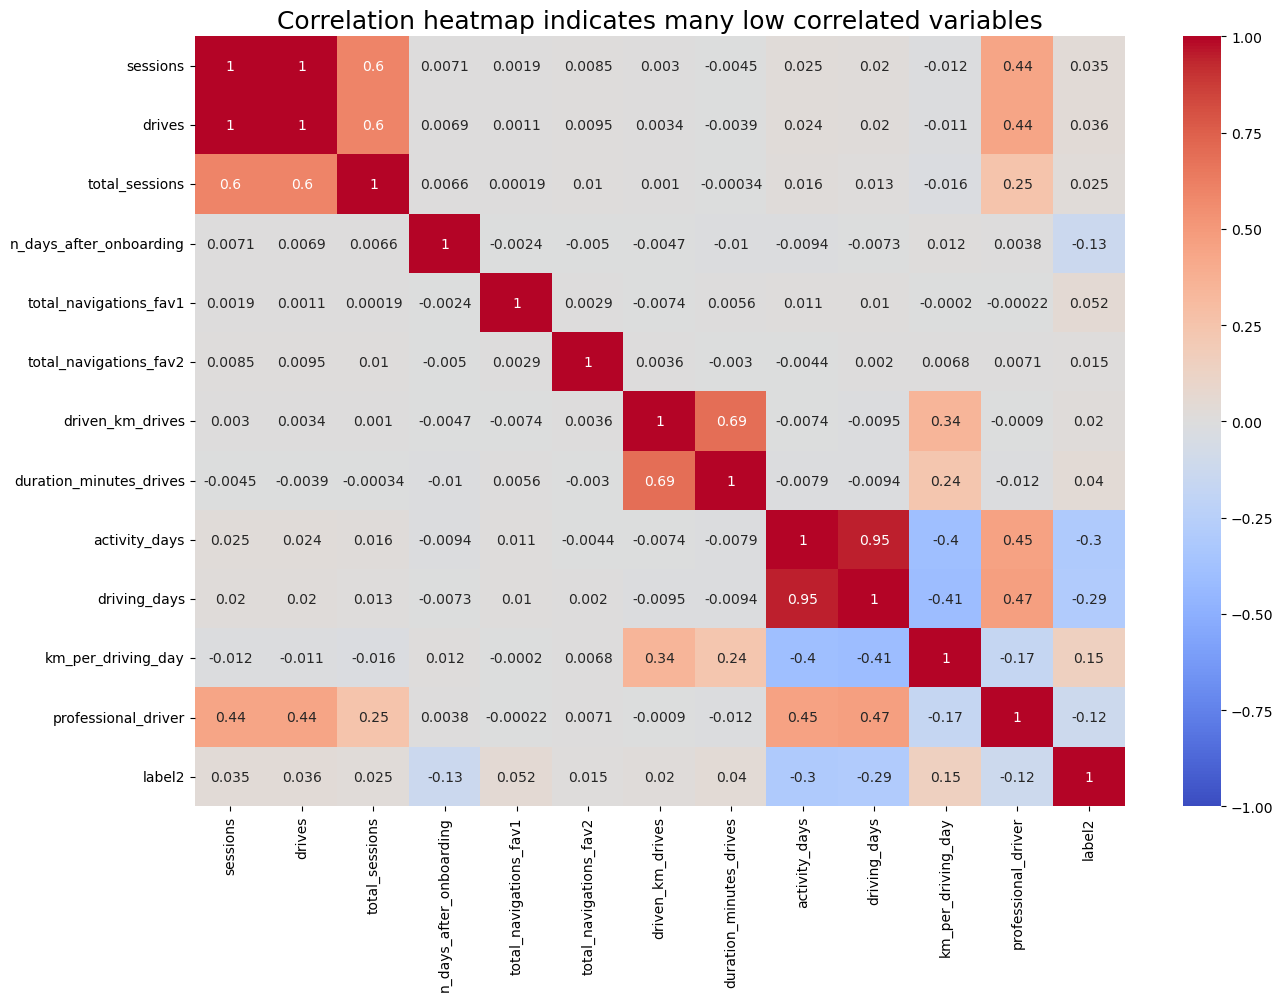

In [46]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

Summary:

The threshold for multicollinearity depends on the industry and the variables being analyzed. A commonly used guideline is that predictor variables with a Pearson correlation coefficient greater than the absolute value of 0.7 are considered strongly multicollinear. 
Examples of Strong Multicollinearity in the Data:

* `sessions` and `drives`: Correlation = 1.0 (perfect multicollinearity)
* `driving_days` and `activity_days`: Correlation = 0.95

In such cases, only one of these variables should be included in the model to avoid redundancy and instability.


### Task 3c. Create dummies for other categorical variables

Create a new binary feature called `device2` which will encode the user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [47]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].head(10)

,device,device2
0,Android,0
1,iPhone,1
2,Android,0
3,iPhone,1
4,Android,0
5,iPhone,1
6,iPhone,1
7,iPhone,1
8,Android,0
9,iPhone,1


### Task 3d. Building the Logistic Regression Model 

#### **Assign predictor variables and target**

To build your model, you need to select the predictor variables (`X`) that will be used to predict the target variable, `label2`.

Exclude the following variables and assign the remaining data to `X`:

* `label` (this is the target variable: categorical)
* `label2` (this is the target variable: Encoded)
* `device` (this is the categorical variable: Encoded one is `device2`)
* `sessions` (this has high multicollinearity)
* `driving_days` (this has high multicollinearity)



In [48]:
# Select the predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

In [49]:
# Select the target variable
y = df['label2']

#### Split the data into train and test 

In [50]:
# Use train_test_split from Sklearn to split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [51]:
# display the train features and some data
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
152,108,186.192746,3116,243,124,8898.716275,4668.180092,24,612.305861,1,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,0,1
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,0,0
669,108,455.439492,2320,11,4,6566.424830,4558.459870,18,410.401552,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,0,1


* We will use the scikit-learn to instantiate a logistic regression model. 

* It is important to add `penalty = 'none'` since your predictors are unscaled.

* Fit the model on `X_train` and `y_train`.

In [52]:
%%time
model = LogisticRegression(penalty='none', max_iter=400)

model.fit(X_train, y_train)


CPU times: total: 188 ms
Wall time: 93.8 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

Summary:

* Use the .coef_ attribute of the model to retrieve the coefficients for each variable. These coefficients correspond to the order in which the variables are listed in the dataset and represent the change in the log odds of the target variable for a one-unit increase in each predictor.
* To enhance interpretability, you can create a series where the index consists of the column names, and the values are the coefficients from model.coef_.

In [53]:
# co-efficient of the regression
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001913
total_sessions             0.000327
n_days_after_onboarding   -0.000406
total_navigations_fav1     0.001232
total_navigations_fav2     0.000931
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.106032
km_per_driving_day         0.000018
professional_driver       -0.001529
device2                   -0.001041
dtype: float64

Call the model's `intercept_` attribute to get the intercept of the model.

In [54]:
#intercept
model.intercept_

array([-0.00170675])

#### Assuption 4: Linear Relationship

To verify the linear relationship between the predictors (X) and the estimated log odds (logits), create a regression plot using the model's predicted probabilities.

**1. Generate Predicted Probabilities:**

* Use the model's predict_proba() method on the training data to calculate the probabilities for each sample. Pass X_train as the argument to this method.
* Assign the result to a variable called training_probabilities.

This will produce a 2D array where:

* The first column contains the probability of a user not churning.
* The second column contains the probability of a user churning.

**2. Create the Regression Plot:**

* Use a regression plot to evaluate the relationship between the predictors (X) and the logits (log-transformed odds). This step helps confirm if the linearity assumption holds.

In [55]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities.shape

(10724, 2)

In [56]:
# 1. create a `logit_data` copying the `X_train` 
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

## Steps to generate the regplot

Let's create a regression plot to examine the relationship between an independent variable and the log-odds of the predicted probabilities:

* X-Axis: Represents the independent variable (e.g., activity_days).
* Y-Axis: Represents the log-odds of the predicted probabilities.
For a comprehensive analysis, this plot should be created for each continuous or discrete predictor variable. Here, only the `activity_days` and `km_per_driving_day` are presented.

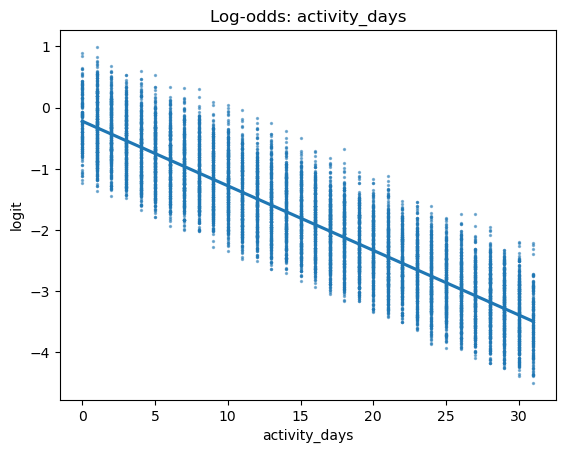

In [57]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

Summary: 

This regression plot illustrates the relationship between the independent variable activity_days (x-axis) and the log-odds (logits) of the predicted probabilities (y-axis). Here's the explanation:

**1. Negative Linear Trend:**

* The plot shows a clear negative linear trend, indicating that as activity_days increases, the log-odds of the target (e.g., churn) decrease.
* This suggests that users with more activity_days are less likely to churn.

**2. catter Points:**

* Each dot represents an individual data point, showing the observed log-odds for a given value of activity_days.
* The spread of the points highlights some variability but aligns reasonably well with the regression line.

**3. Regression Line:**

* The line represents the best-fit linear relationship between activity_days and the log-odds, based on the logistic regression model.
* This confirms that the linearity assumption for the relationship between the predictor (activity_days) and the log-odds holds for this variable.

**4. Interpretation:**

* The plot verifies that activity_days contributes predictably to the log-odds, supporting its inclusion as a predictor in the logistic regression model.
* The decrease in log-odds with higher activity_days aligns with the hypothesis that increased app activity reduces the likelihood of churn.

This plot demonstrates that the variable activity_days meets the linearity assumption of logistic regression. For exhaustive analysis, similar plots should be generated for all continuous or discrete predictors.

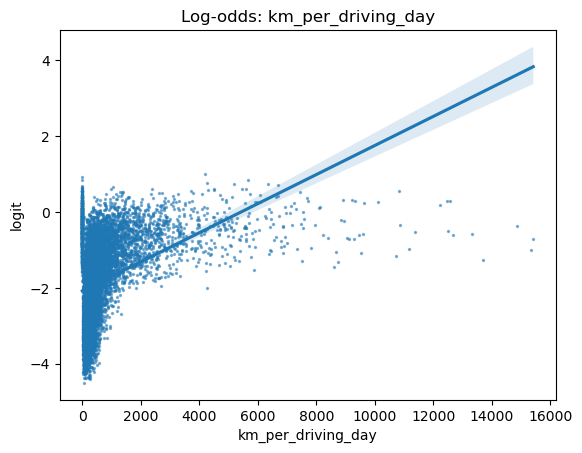

In [58]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='km_per_driving_day', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: km_per_driving_day');

Summary: 

This regression plot illustrates the relationship between km_per_driving_day (x-axis) and the log-odds (y-axis) of the predicted probabilities. Here's the breakdown:

**Key Observations**

**1. Positive Linear Trend:**

* The plot shows a positive linear relationship between km_per_driving_day and the log-odds, particularly for values beyond ~2000 km.
* As the average distance driven per driving day increases, the log-odds (and hence the probability) of the target variable increase.

**2. Scatter Points:**

* Each dot represents an individual data point, showing the log-odds for a given km_per_driving_day.
* The points are more concentrated at lower values, with greater dispersion as the values increase.

**3. Non-Linear Behavior at Low Values:**

* At lower values (below ~2000 km), there is some non-linear variability, as the log-odds do not follow a straight-line trend. 
* This may indicate non-linearity in the relationship at lower driving distances.

**4. Regression Line:**

* The regression line represents the model's best-fit linear relationship.
* The shaded area around the line is the confidence interval, which widens for higher values of km_per_driving_day, indicating greater uncertainty due to fewer data points.

**5. Interpretation:**

* Users with higher km_per_driving_day values are associated with higher log-odds, which could suggest a higher likelihood of a specific target behavior (e.g., retention or churn).
* However, the non-linear pattern at lower values suggests the need for further exploration, potentially through feature transformations or a more flexible model.

This plot provides insight into the relationship between km_per_driving_day and the target variable, supporting its inclusion in the logistic regression model while highlighting areas for further analysis.

## Stage 4: Execute

### Task 4a. Results and Evaluation

In [59]:
# Generate the predictions on X_test
y_preds = model.predict(X_test)

In [60]:
# FInd the score the model based on the test set 
f1 = f1_score (y_test, y_preds)
recall = recall_score (y_test, y_preds)
precision = precision_score (y_test, y_preds)
accuracy = accuracy_score (y_test, y_preds)

# FInally create the table and return it
result_LR_test = pd.DataFrame({'model': ['Logistic Regression'],
                      'precision': [precision],
                      'recall': [recall],
                      'F1': [f1],
                      'accuracy': [accuracy],
                      },
                     )
result_LR_test

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.517857,0.091483,0.155496,0.823776


### **Task 4b. Buidling a Confusion Matrix**

In [61]:
#create a confusion matrix
cm = confusion_matrix(y_test, y_preds)

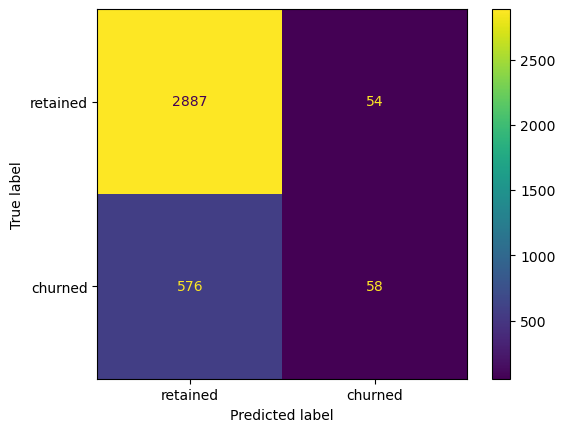

In [62]:
# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

In [63]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



Summary:

The model demonstrates mediocre precision and very low recall, indicating that it generates a significant number of false negatives and fails to effectively identify users who are likely to churn.

### **Task 4c. Buidling a Confusion Matrix**

Presenting the model's coefficients and importance of the model's features.

In [64]:
# Create a list of tuples (feature name, coefficient value)
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sorting the list based on coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.0019133712255661464),
 ('total_navigations_fav1', 0.001231755145692775),
 ('total_navigations_fav2', 0.0009314793467132174),
 ('total_sessions', 0.000327068748880347),
 ('duration_minutes_drives', 0.00010909336814030778),
 ('km_per_driving_day', 1.8222998378084536e-05),
 ('driven_km_drives', -1.4860354905037569e-05),
 ('n_days_after_onboarding', -0.0004064775904525743),
 ('device2', -0.0010412176754759357),
 ('professional_driver', -0.0015285043758531314),
 ('activity_days', -0.10603198046420641)]

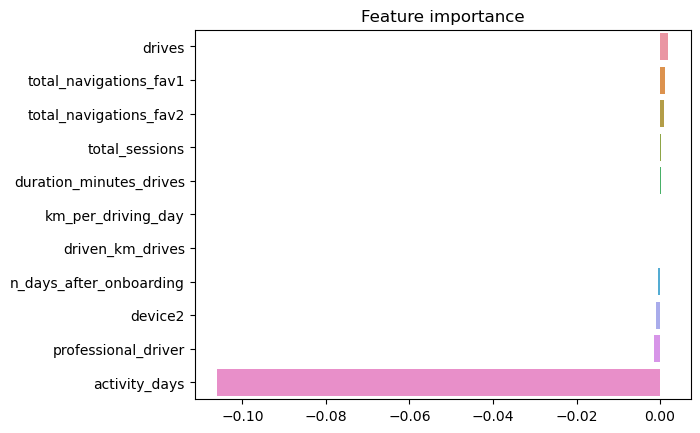

In [65]:
# Plotting the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

**Summary:**

**1. Activity Days Dominates:**

* The feature `activity_days` has the largest coefficient, indicating it is the most influential predictor in determining the target variable (e.g., churn).
* A higher number of activity days has a significant positive or negative impact on the log-odds of the outcome.

**2. Other Features Have Minimal Impact:**

* Features such as `drives`, `total_navigations_fav1`, `total_sessions`, and `km_per_driving_day` have very small coefficients close to zero, meaning their contribution to the model is negligible.
* These features may have limited predictive power or may be highly correlated with other variables.

**3. Professional Driver and Device Type:**

* `professional_driver` and `device2` have slightly larger coefficients compared to others (excluding `activity_days`), suggesting they may provide moderate predictive value.

**4. Negative Coefficients:**

* Features with negative coefficients, such as `drives`, indicate that an increase in these variables decreases the log-odds of the target variable.

**Interpretation:**

* Larger absolute values of coefficients (positive or negative) indicate greater influence on the prediction.
* Smaller absolute values near zero suggest less impact or possible redundancy.

**Model Focus:**

* The model heavily relies on activity_days to make predictions, potentially overlooking other features.
* This may indicate the need for feature selection or additional engineering to balance the contribution of variables.

# Model 2: Decision Tree

Another model applied to the data is a Decision Tree.

# Stage 3: Construct

In [66]:
#1. Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

In [67]:
# 2. Create a dictionary of hyperparameters to tune
cv_params = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 5, 10, 20, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum samples required at a leaf node
}

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
DT_cv = GridSearchCV(
    estimator=decision_tree, 
    param_grid=cv_params, 
    scoring=scoring, 
    cv=4,  # 4-fold cross-validation
    refit='f1',  # Optimize for 'f1' when refitting the model
    verbose=1,  # Show progress
    n_jobs=-1  # Use all available processors
)

In [68]:
%%time
DT_cv.fit(X_train, y_train)

Fitting 4 folds for each of 160 candidates, totalling 640 fits
CPU times: total: 1.38 s
Wall time: 11.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

# Stage 4: Execute

In [69]:
#best parameters for the DT
DT_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [70]:
#best score for the DT
DT_cv.best_score_

0.2950852828002649

In [71]:
#create a function to get the evaluation metric and display by a Table 
def make_results(model_name:str, model_object, metric:str):
    """
        Arguments:
            model_name (str): The name you want to assign to the model in the output table.
            model_object: A fitted GridSearchCV object containing the trained model.
            metric (str): The evaluation metric to focus on (e.g., 'precision', 'recall', 'f1', or 'accuracy').

        Returns:
            pd.DataFrame: A DataFrame containing the F1, recall, precision, and accuracy scores
            for the model with the best mean score for the specified 'metric' across all validation folds.
    """

    # A dictionary to map the input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Create a data frame to store the results from the CV 
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Find the accuracy, precision, recall, and F1 score from the specified row 
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # FInally create the table and return it
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [72]:
#find the result based on the best F1 score
result_DT_train=make_results('Decision Tree',DT_cv, 'f1' )
result_DT_train

,model,precision,recall,F1,accuracy
0,Decision Tree,0.312922,0.279715,0.295085,0.763055


In [73]:
# Use Decison Tree model to predict on test data
DT_test_preds = DT_cv.best_estimator_.predict(X_test)

In [74]:
# generate the score based on the test data
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    from sklearn.metrics import f1_score
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1_test = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1_test],
                          'accuracy': [accuracy]
                          })

    return table

In [75]:
# score from the test data 
result_DT_test=get_test_scores('Decision Tree Test',DT_test_preds, y_test)
result_DT_test


,model,precision,recall,F1,accuracy
0,Decision Tree Test,0.277978,0.242902,0.259259,0.753846


In [76]:
# Append to the tables for the final eval 
results = pd.concat([result_LR_test, result_DT_train, result_DT_test], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.517857,0.091483,0.155496,0.823776
0,Decision Tree,0.312922,0.279715,0.295085,0.763055
0,Decision Tree Test,0.277978,0.242902,0.259259,0.753846


**Summary:**

**Logistic Regression:**

* Achieves higher accuracy but at the cost of poor recall, meaning it fails to capture most churners.
* Precision is relatively high but is insufficient to balance the poor recall.

**Decision Tree:**

* Sacrifices some accuracy to achieve a better balance between precision and recall.
* Higher recall compared to Logistic Regression makes it more effective at identifying churners.

**Displaying the Confusion Matrix**

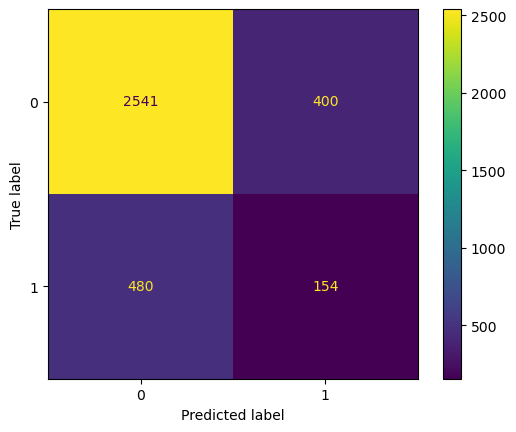

In [78]:
#Confusion Matrix display
cm = confusion_matrix(y_test, DT_test_preds, labels = DT_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = DT_cv.classes_)
disp.plot()

**Visualizing a Decision Tree**

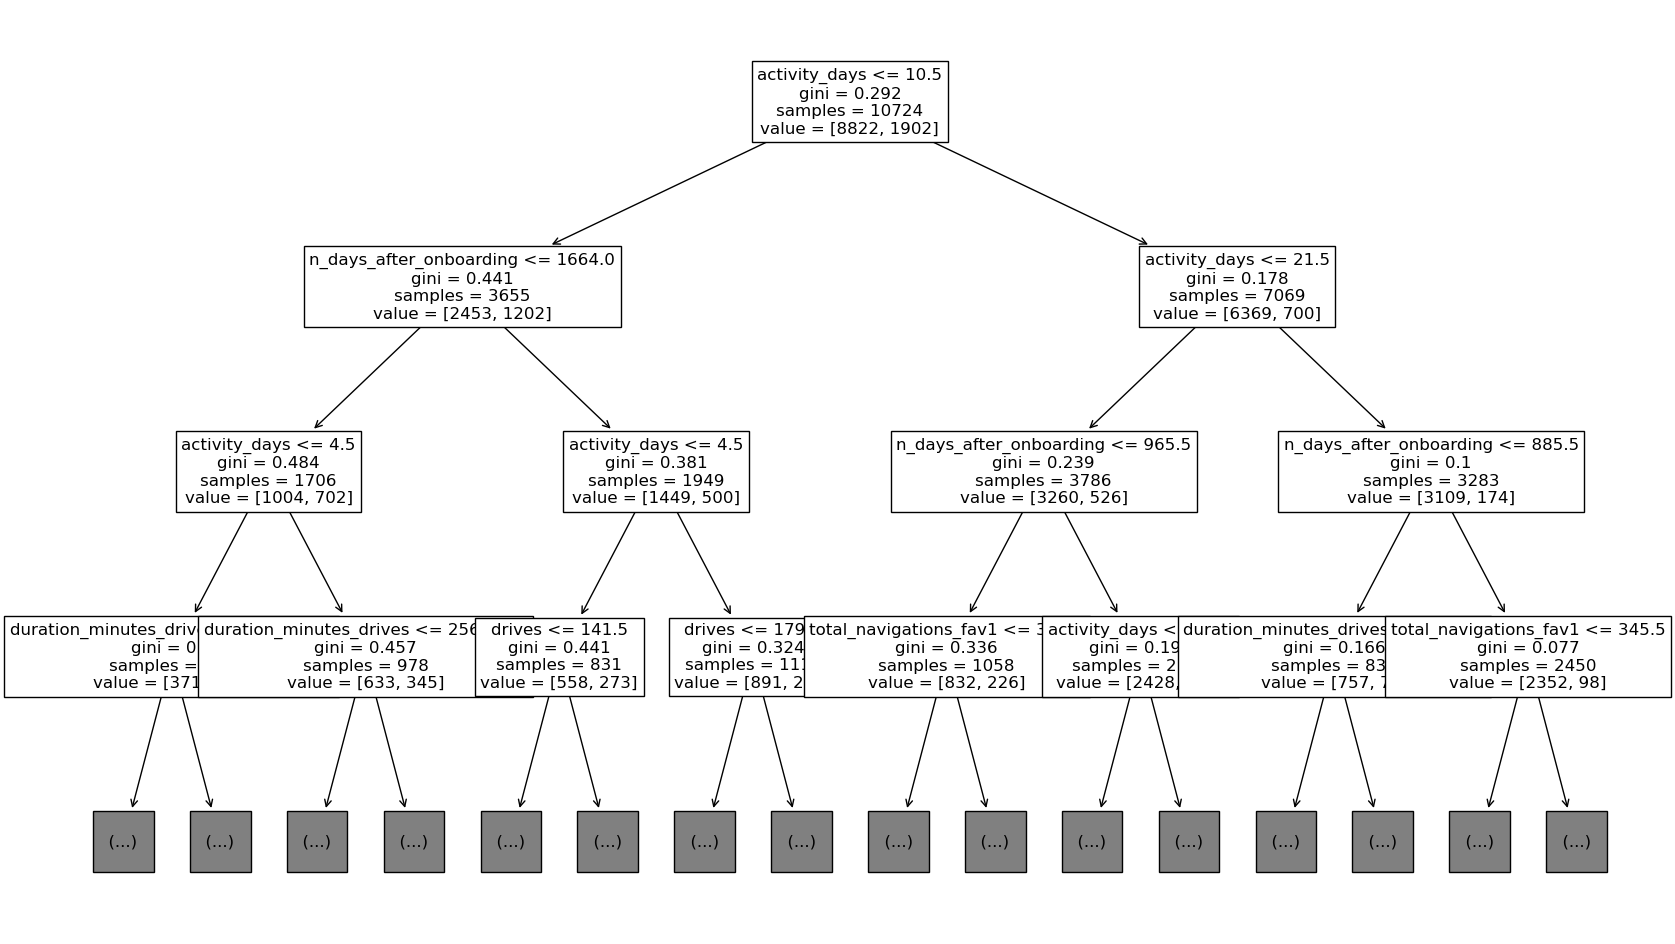

In [79]:
# Plotting a Decision Tree till depth 3
plt.figure(figsize=(20,12))
plot_tree(DT_cv.best_estimator_, max_depth=3, fontsize=12, feature_names=X.columns);

**Find the relative importances of each feature**

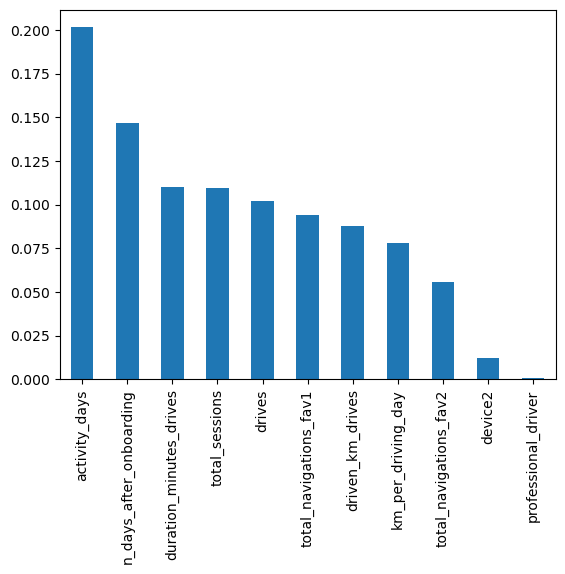

In [80]:
importances = DT_cv.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

**Summary:**

**Top Features:**

* `activity_days`: The most important feature, contributing nearly 20% to the model. This aligns with its strong correlation to user engagement and churn likelihood.
* `n_days_after_onboarding`: The second most important feature (~17%), indicating that how long a user has been onboarded strongly impacts churn behavior.
* `duration_minutes_drives`, `total_sessions`, and `drives`: These features have moderate importance, showing relevance to user activity levels.

**Lower Importance Features:**

* Features like `device2` and `professional_driver` contribute minimally, indicating that they have little predictive power in the Decision Tree model.

**Comparison and Key takeway:**

* Consistency: Both models identify `activity_days` as the most significant predictor of churn.
* Differences:

    * Logistic Regression heavily focuses on activity_days, with much lower contributions from other features.
    * Decision Tree distributes importance across multiple features, highlighting additional predictors like n_days_after_onboarding and duration_minutes_drives.
    
* Decision Tree's Strength: Its ability to capture non-linear relationships provides a more balanced view of feature importance, making it potentially more insightful for understanding complex patterns in the data.